In [8]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from sympy import *
from sympy.physics.mechanics import ReferenceFrame
import itertools
from tqdm import tqdm


thetas = symbols('theta1:7')
lengths = symbols('l1:7')

# Function to create a 4x4 transformation matrix from a rotation matrix and translation vector
def transformation_matrix(rotation, translation):
    T = eye(4)
    T[0:3, 0:3] = rotation
    T[0:3, 3] = translation
    return T

links = [Matrix([0,0,lengths[i]]) for i in range(6)]


base = ReferenceFrame('base')
joints = [ReferenceFrame("joint"+str(i+1)) for i in range(6)]
joints[0].orient_axis(base, base.z, thetas[0])
joints[1].orient_axis(joints[0], joints[0].x, thetas[1])
joints[2].orient_axis(joints[1], joints[1].z, thetas[2])
joints[3].orient_axis(joints[2], joints[2].x, thetas[3])
joints[4].orient_axis(joints[3], joints[3].z, thetas[4])
joints[5].orient_axis(joints[4], joints[4].x, thetas[5])

# Create the transformation matrices
T1 = transformation_matrix(joints[0].dcm(base), links[0])
T2 = transformation_matrix(joints[1].dcm(joints[0]), links[1])
T3 = transformation_matrix(joints[2].dcm(joints[1]), links[2])
T4 = transformation_matrix(joints[3].dcm(joints[2]), links[3])
T5 = transformation_matrix(joints[4].dcm(joints[3]), links[4])
T6 = transformation_matrix(joints[5].dcm(joints[4]), links[5])
T7_end_eff = transformation_matrix(eye(3), Matrix([0,0,1]))

symbolic_fkin = T1 @ T2 @ T3 @ T4 @ T5 @ T6 @ T7_end_eff

def fkin(angles):
    return symbolic_fkin.subs({thetas[0]: angles[0], thetas[1]: angles[1], thetas[2]: angles[2], thetas[3]: angles[3], thetas[4]: angles[4], thetas[5]: angles[5], lengths[0]: 0, lengths[1]: 1, lengths[2]: 1, lengths[3]: 1, lengths[4]: 1, lengths[5]: 1})

fkin([0,0,0,0,0,0])

symbolic_fkin

Matrix([
[ -((sin(theta1)*cos(theta2)*cos(theta3) + sin(theta3)*cos(theta1))*cos(theta4) - sin(theta1)*sin(theta2)*sin(theta4))*sin(theta5) + (-sin(theta1)*sin(theta3)*cos(theta2) + cos(theta1)*cos(theta3))*cos(theta5),   (((sin(theta1)*cos(theta2)*cos(theta3) + sin(theta3)*cos(theta1))*cos(theta4) - sin(theta1)*sin(theta2)*sin(theta4))*cos(theta5) + (-sin(theta1)*sin(theta3)*cos(theta2) + cos(theta1)*cos(theta3))*sin(theta5))*cos(theta6) - ((sin(theta1)*cos(theta2)*cos(theta3) + sin(theta3)*cos(theta1))*sin(theta4) + sin(theta1)*sin(theta2)*cos(theta4))*sin(theta6),   (((sin(theta1)*cos(theta2)*cos(theta3) + sin(theta3)*cos(theta1))*cos(theta4) - sin(theta1)*sin(theta2)*sin(theta4))*cos(theta5) + (-sin(theta1)*sin(theta3)*cos(theta2) + cos(theta1)*cos(theta3))*sin(theta5))*sin(theta6) + ((sin(theta1)*cos(theta2)*cos(theta3) + sin(theta3)*cos(theta1))*sin(theta4) + sin(theta1)*sin(theta2)*cos(theta4))*cos(theta6),     l3*sin(theta1)*sin(theta2) + l4*sin(theta1)*sin(theta2) + l5*((sin(t

In [40]:
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
from itertools import product


puma = rtb.models.DH.Puma560()
qlim = puma.qlim
angles = np.array([np.linspace(qlim[0, i], qlim[1, i], 10) for i in range(0, puma.q.size)])
type(qlim[0,1]) 
# workspace_points = []
# 
# for angle_set in product(*angles):
#     T = puma.fkine(angle_set)  # Forward kinematics
#     position = T.t           # Extract translation part
#     workspace_points.append(position)
# 
# workspace_points = np.array(workspace_points)

numpy.float64

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(workspace_points[:, 0], workspace_points[:, 1], workspace_points[:, 2], s=1)
ax.set_title('End Effector Workspace')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
plt.show()

In [19]:
# Function to create a 4x4 transformation matrix from a rotation matrix and translation vector
def transformation_matrix2(rotation, translation):
    T = np.eye(4)
    T[0:3, 0:3] = rotation
    T[0:3, 3] = translation
    return T

# Example rotation matrices (identity matrices for simplicity)
R1 = R.from_euler("z", 0, degrees=True).as_matrix()  # Rotation about z-axis for joint 1
R2 = R.from_euler("x", 45, degrees=True).as_matrix()  # Rotation about x-axis for joint 2
R3 = np.eye(3)  # Identity rotation matrix for joint 3
# Example translation vectors (position of joint 1 and joint 2 relative to the previous joint)
P1 = np.array([0, 0, 0])  # Translation along z-axis for joint 1
P2 = np.array([0, 0, 1])  # Translation along z-axis for joint 2
P3 = np.array([0, 0, np.sqrt(2)])  # Translation along z-axis for joint 3

# Create the transformation matrices
T1 = transformation_matrix2(R1, P1)
T2 = transformation_matrix2(R2, P2)
T3 = transformation_matrix2(R3, P3)

# Compute the end effector transformation matrix
T_end_effector = T1 @ T2 @ T3

# Extract the position of the end effector (last column of the 4x4 matrix)
end_effector_position = T_end_effector[0:3, 3]

# Output the end effector position
print("End Effector Position:", end_effector_position)

End Effector Position: [ 0. -1.  2.]


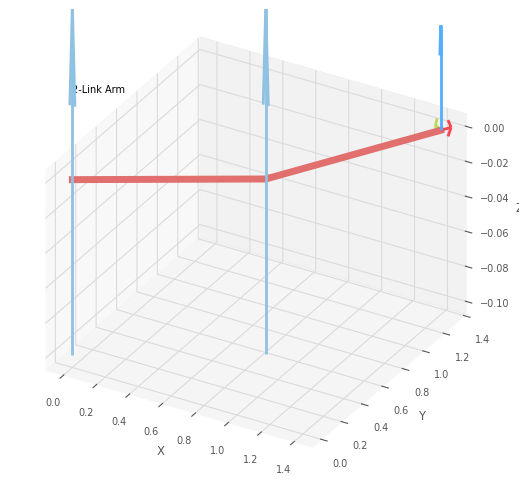

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [13]:
from roboticstoolbox import DHRobot, RevoluteDH

# Define the robot using DH parameters
robot = DHRobot([
    RevoluteDH(a=1, alpha=0),  # Link 1
    RevoluteDH(a=1, alpha=0)   # Link 2
], name='2-Link Arm')

# Define joint angles (in radians)
q = [0.5, 0.5]  # Example joint configuration

# Plot the robot
robot.plot(q, block=True)